# **QSAR Model Building of Acetylcholinesterase Inhibitors**

Chanin Nantasenamat

*Data Professor YouTube channel, http://youtube.com/dataprofessor*

# Read in data

In [1]:
import pandas as pd

In [3]:
dataset_url = '/content/Dihydroorotate_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.370590
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.845880
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.029653
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.813892
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.602060
547,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.602060
548,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.602060
549,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.602060


In [4]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
547,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
548,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
549,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y = dataset.iloc[:,-1]
Y

,pIC50
0,4.370590
1,3.845880
2,4.029653
3,3.813892
4,3.698970
...,...
546,3.602060
547,3.602060
548,3.602060
549,3.602060


# Remove low variance features

In [6]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP37,...,PubchemFP710,PubchemFP712,PubchemFP716,PubchemFP737,PubchemFP755,PubchemFP770,PubchemFP779,PubchemFP800,PubchemFP818,PubchemFP833
0,0,1,0,0,1,1,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
1,1,1,0,0,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,1,0,0,1,1,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
3,0,1,0,0,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,0,1,0,0,1,1,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
547,1,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
549,1,1,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
X.to_csv('descriptor_list.csv', index = False)

In [35]:
# In the app, use the following to get this same descriptor list
# of 205 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.895090132753496

## Model Prediction

In [38]:
Y_pred = model.predict(X)
Y_pred

array([4.02413818, 3.84837656, 3.88742545, 3.911019  , 3.88742545,
       4.02413818, 6.12086271, 4.04605568, 6.63850499, 6.69377438,
       4.16940554, 4.41292131, 3.56016902, 3.54803349, 3.81992709,
       3.78284462, 4.08702732, 4.49738011, 6.0004354 , 4.60098955,
       4.14648565, 4.14648565, 4.60056785, 4.57376102, 6.0004354 ,
       5.00852145, 5.54466812, 4.57376102, 6.0004354 , 6.43043893,
       5.79535551, 6.27177448, 5.51202441, 5.76765939, 5.63867992,
       5.74451638, 5.34693652, 5.48293299, 4.40463732, 4.40463732,
       4.40463732, 4.40463732, 4.40463732, 4.40463732, 4.40463732,
       4.40463732, 5.4395451 , 4.40463732, 4.40463732, 4.30328877,
       5.40935685, 5.98903673, 5.54466812, 6.06612848, 6.03088073,
       6.03088073, 5.4395451 , 7.00804195, 4.57376102, 6.81145768,
       6.43043893, 4.84278556, 4.86152676, 5.54320228, 6.18841663,
       5.68911197, 5.518224  , 4.51409036, 4.71967046, 5.37647725,
       6.81145768, 6.81145768, 6.54283025, 5.24140879, 4.96778

## Model Performance

In [39]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.14
Coefficient of determination (R^2): 0.90


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [40]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

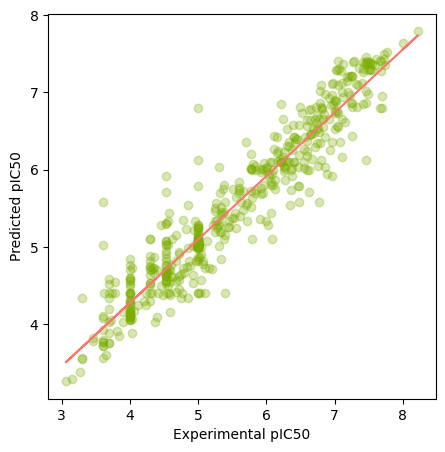

In [41]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [42]:
import pickle

In [43]:
pickle.dump(model, open('Dihydroorotate_model.pkl', 'wb'))